In [2]:
'''
ECSE 556 Homework 1
Dimensionality Reduction
Gian Favero
October 6th, 2023
'''

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import time

# import data
data = np.genfromtxt('Data/gdsc_expr_postCB.csv', delimiter=',')
data = data[1:,1:]
data = np.transpose(data)

# Dimensionality Reduction

Principal Component Analysis (PCA)

In [3]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=2)

# Fit and tranform data
pca_start = time.time()
data_pca = pca.fit_transform(data)
pca_end = time.time()

UMAP

In [4]:
import umap

# Create UMAP object
u_map = umap.UMAP(n_components=2)

# UMAP reduction of data
umap_start = time.time()
data_umap = u_map.fit_transform(data)
umap_end = time.time()

c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\umap\distanc

t-SNE

In [5]:
from sklearn.manifold import TSNE

# Generate TSNE object
tsne = TSNE(n_components=2)

# Fit and transform data
tsne_start = time.time()
data_tsne = tsne.fit_transform(data)
tsne_end = time.time()

Comparison (Default Params)

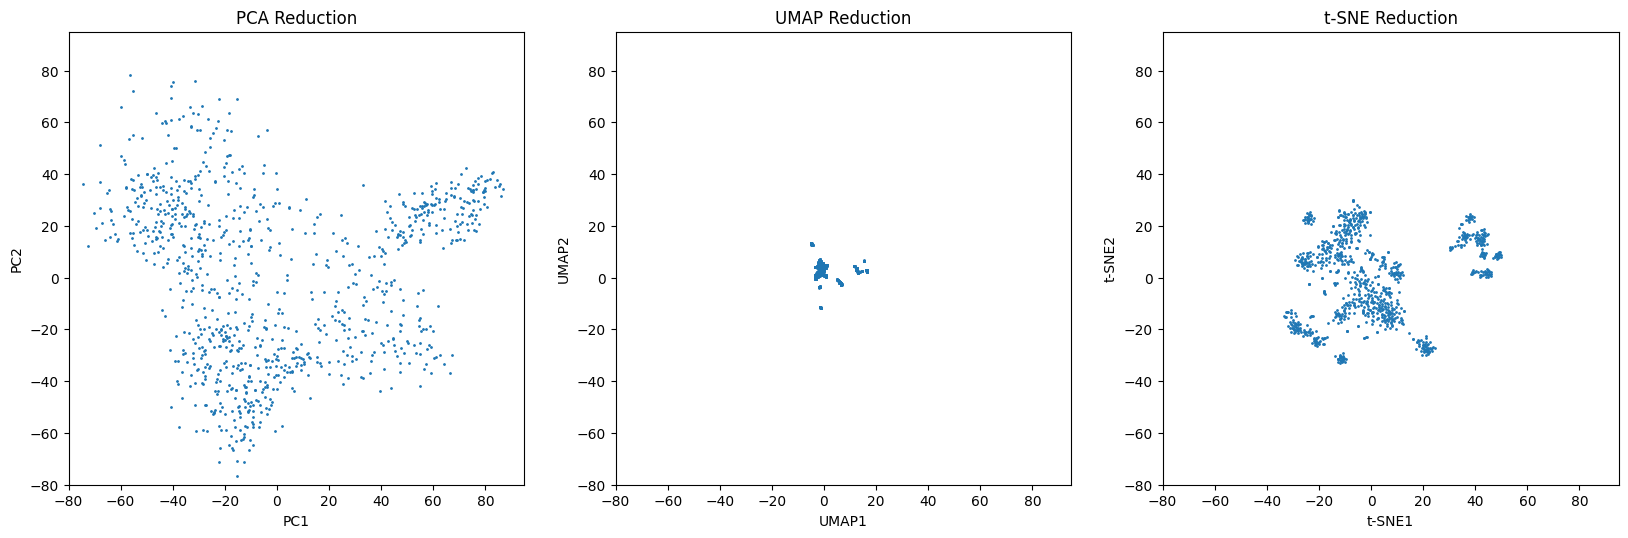

+-----------------------------+
|     Run Time Comparison     |
+--------+--------------------+
| Method |    Run Time (s)    |
+--------+--------------------+
|  PCA   | 0.7369444370269775 |
|  UMAP  | 11.800269365310669 |
|  TSNE  | 5.827584743499756  |
+--------+--------------------+


In [6]:
# Plotting
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.scatter(data_pca[:,0], data_pca[:,1], s=1)
plt.xlim(-80, 95)
plt.ylim(-80, 95)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Reduction')

plt.subplot(332)
plt.scatter(data_umap[:,0], data_umap[:,1], s=1)
plt.xlim(-80, 95)
plt.ylim(-80, 95)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Reduction')

plt.subplot(333)
plt.scatter(data_tsne[:,0], data_tsne[:,1], s=1)
plt.xlim(-80, 95)
plt.ylim(-80, 95)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Reduction')
plt.show()

# Run time comparison
import prettytable as pt

t = pt.PrettyTable(['Method', 'Run Time (s)'])
t.add_row(['PCA', pca_end - pca_start])
t.add_row(['UMAP', umap_end - umap_start])
t.add_row(['TSNE', tsne_end - tsne_start])
t.title = 'Run Time Comparison'
print(t)

UMAP Analysis

In [7]:
# Changing number of neighbours
neighbours = [5, 20, 150]
umaps = []
for n in neighbours:
    u_map = umap.UMAP(n_components=2, n_neighbors=n)
    umaps.append(u_map.fit_transform(data))

# Changing min distance
min_dist = [0.1, 0.5, 0.9]
for m in min_dist:
    u_map = umap.UMAP(n_components=2, min_dist=m)
    umaps.append(u_map.fit_transform(data))

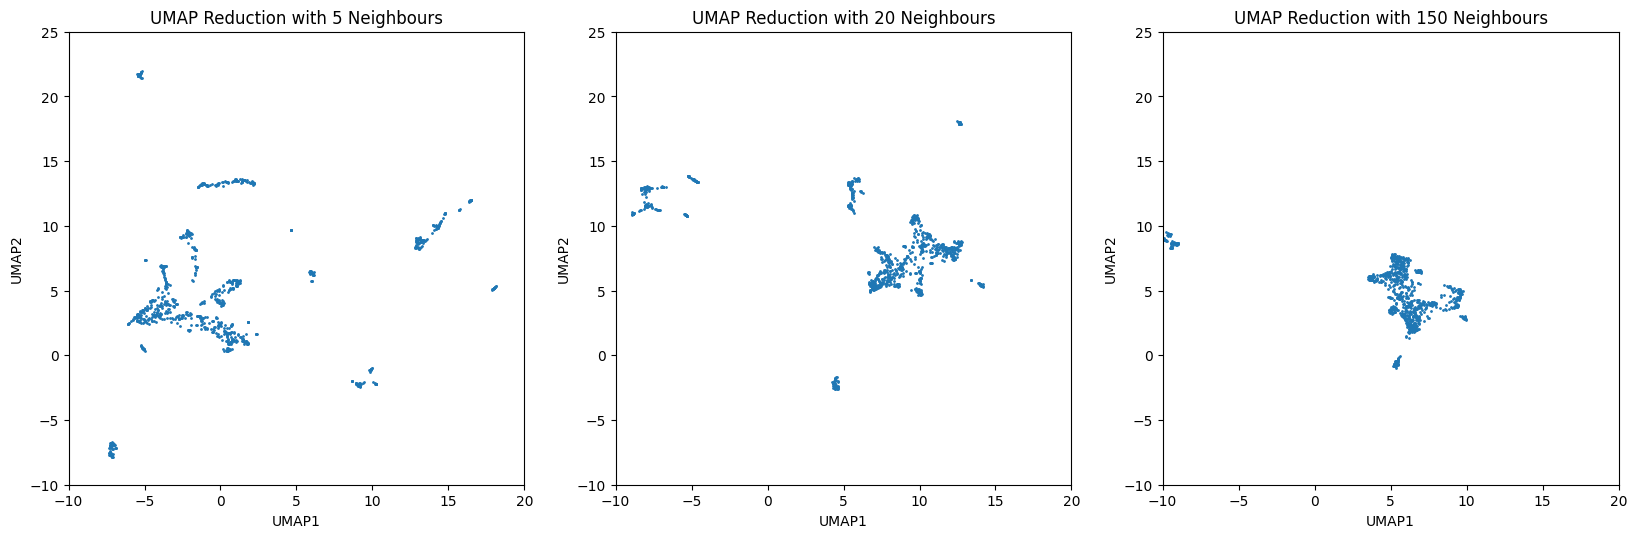

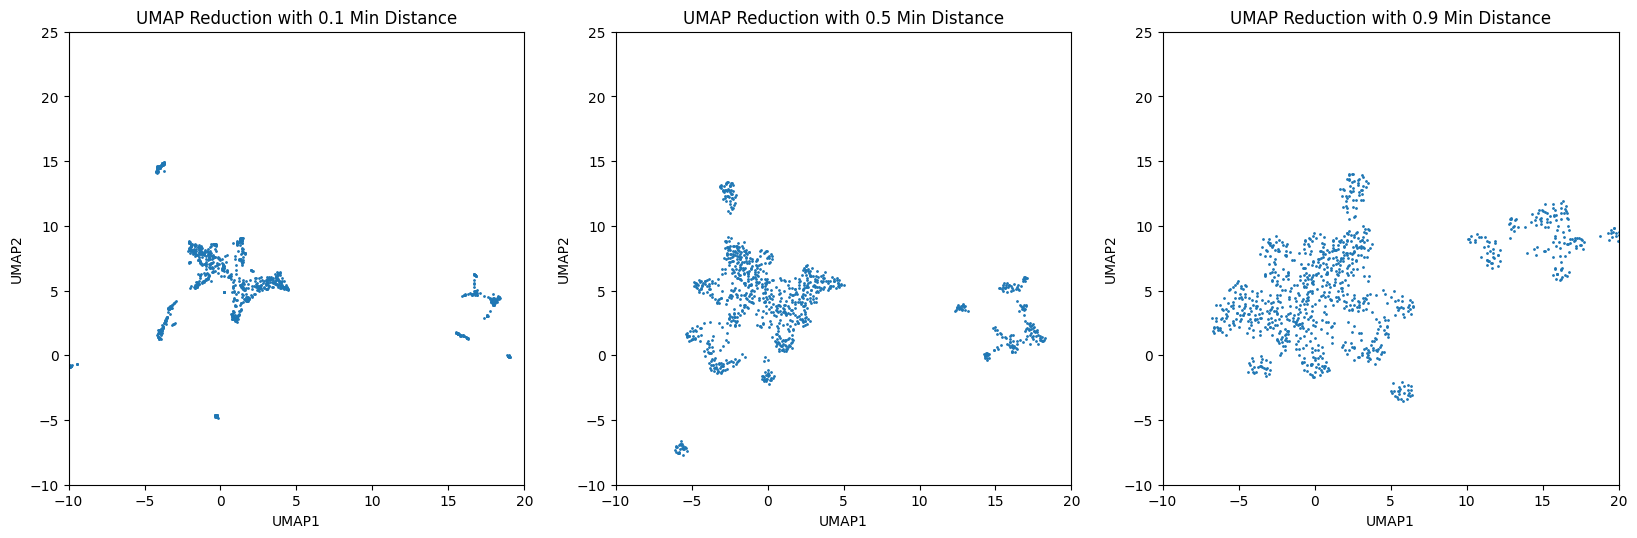

In [8]:
# Plotting UMAPs
plt.figure(figsize=(20,20))
for i in range(3):
    plt.subplot(331+i)
    plt.xlim(-10, 20)
    plt.ylim(-10, 25)
    plt.scatter(umaps[i][:,0], umaps[i][:,1], s=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'UMAP Reduction with {neighbours[i]} Neighbours')
plt.show()

plt.figure(figsize=(20,20))
for i in [3, 4, 5]:
    plt.subplot(331+i)
    plt.xlim(-10, 20)
    plt.ylim(-10, 25)
    plt.scatter(umaps[i][:,0], umaps[i][:,1], s=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'UMAP Reduction with {min_dist[i % 3]} Min Distance')
plt.show()

t-SNE Analysis

In [9]:
# Changing perplexity
perplexities = [5, 50, 150]
tsnes = []
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p)
    tsnes.append(tsne.fit_transform(data))

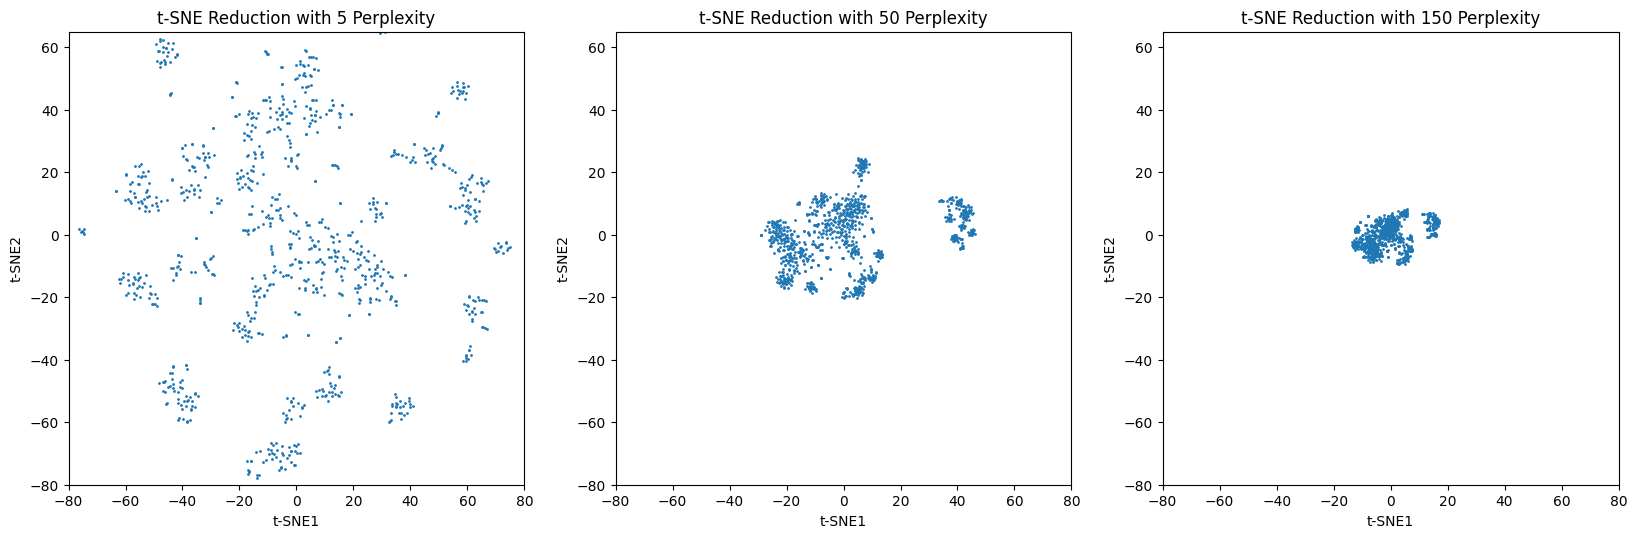

In [10]:
# Plotting TSNEs
plt.figure(figsize=(20,20))
for i in range(3):
    plt.subplot(331+i)
    plt.xlim(-80, 80)
    plt.ylim(-80, 65)
    plt.scatter(tsnes[i][:,0], tsnes[i][:,1], s=1)
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.title('t-SNE Reduction with {} Perplexity'.format(perplexities[i]))
plt.show()